In [2]:
from collections import namedtuple
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
out_path = "outputs/heating-with-eplus-psychro/MinimalDX.csv"
outputs = pd.read_csv(out_path, delim_whitespace=True, na_values='Infinity')

# determine output variables and row count from ref impl
Var = namedtuple('Variable', ['key', 'name', 'unit'])

out_vars = [
    Var(name, *name.split('|'))
    for name in outputs.columns.values
]

inputs = pd.read_csv("outputs/heating-with-eplus-psychro/test_data_heating.csv" , delim_whitespace=True, na_values='Infinity')

# determine output variables and row count from ref impl
Var = namedtuple('Variable', ['key', 'name', 'unit'])

in_vars = [
    Var(name, *name.split('|'))
    for name in inputs.columns.values
]

x = inputs["OutdoorTDryBulb|°C"]


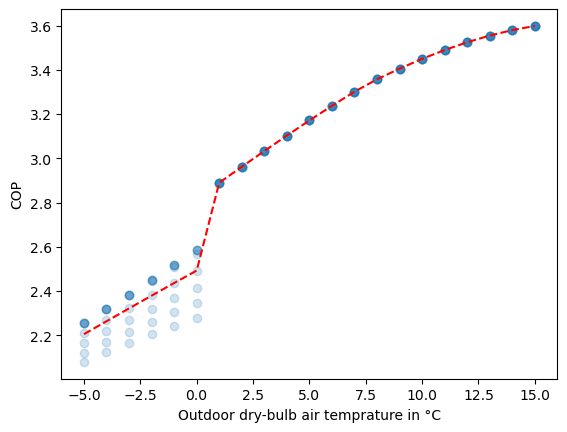

In [4]:
y = outputs["COP|1"]
fig, ax = plt.subplots()
ax.scatter(x,y, alpha=0.2)
df = pd.concat([x, y], axis=1)
mean_values = df.groupby(df.columns[0])[df.columns[1]].mean()
mean_values.plot(color="r", linestyle="--", ax=ax)
ax.set_ylabel("COP")
ax.set_xlabel("Outdoor dry-bulb air temprature in °C");

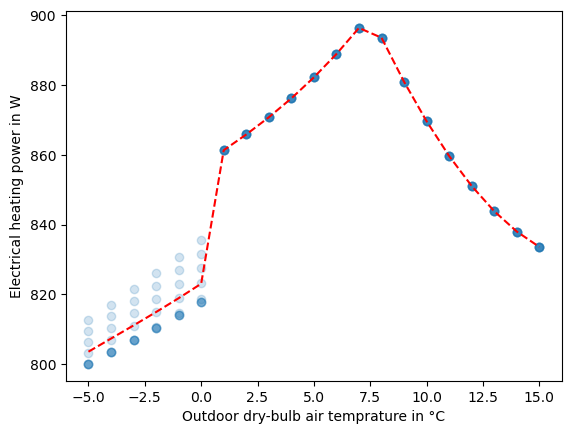

In [5]:
y = outputs["ElecHeatingPower|W"]
fig, ax = plt.subplots()
ax.scatter(x,y, alpha=0.2)
df = pd.concat([x, y], axis=1)
mean_values = df.groupby(df.columns[0])[df.columns[1]].mean()
mean_values.plot(color="r", linestyle="--", ax=ax)
ax.set_ylabel("Electrical heating power in W")
ax.set_xlabel("Outdoor dry-bulb air temprature in °C");

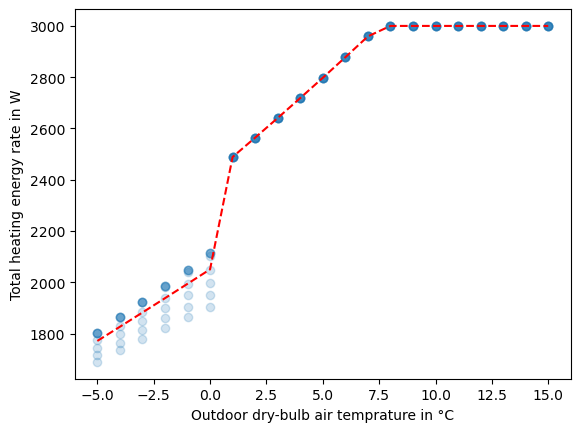

In [6]:
y = outputs["TotalHeatingEnergyRate|W"]
fig, ax = plt.subplots()
ax.scatter(x,y, alpha=0.2)
df = pd.concat([x, y], axis=1)
mean_values = df.groupby(df.columns[0])[df.columns[1]].mean()
mean_values.plot(color="r", linestyle="--", ax=ax)
ax.set_ylabel("Total heating energy rate in W")
ax.set_xlabel("Outdoor dry-bulb air temprature in °C");